# Initial EDA

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
import os
import pathlib

from trav_lib.visualize import plot_log_hist
from trav_lib.analyze import analyze_col, bin_analyze_col

sns.set()
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data_dir = pathlib.Path().resolve().parent / 'data'

data_raw = data_dir / 'raw'
data_interim = data_dir / 'interim'
data_external = data_dir / 'external'
data_processed = data_dir / 'processed'

model_dir = pathlib.Path().resolve().parent / 'models'

In [3]:
train = pd.read_parquet(data_interim / 'train.parquet')
# test = pd.read_parquet(data_interim / 'test.parquet')

In [4]:
start_date = '2017-12-01'
train['transaction_dt'] = pd.to_datetime(start_date) + pd.to_timedelta(train['transaction_dt'] - 86400, unit='s')

In [5]:
target_col = 'is_fraud'
date_col = 'transaction_dt'
trans_cat_cols = ['product_cd','card1','card2','card3','card4','card5','card6','addr1','addr2',
                  'p_emaildomain','r_emaildomain','m1','m2','m3','m4','m5','m6','m7','m8','m9']
trans_num_cols = list(train.loc[:,:'v339'].columns.drop([target_col] + trans_cat_cols + [date_col]))

ident_cat_cols = list(train.loc[:,'id_12':'identity_match'].columns)
ident_num_cols = list(train.loc[:,'id_01':'id_11'].columns)

cat_cols = trans_cat_cols + ident_cat_cols
num_cols = trans_num_cols + ident_num_cols

# Target variable, is_fraud

In [6]:
train['is_fraud'].value_counts()

0    569877
1     20663
Name: is_fraud, dtype: int64

In [7]:
train['is_fraud'].value_counts(normalize=True)

0    0.96501
1    0.03499
Name: is_fraud, dtype: float64

At just under 3.5% of transactions being marked as fraudulent, this dataset is highly imbalanced. This is also most likely a contrived dataset, as I would imagine that the true rate of fraudulent transactions is far lower than that, less than 1% I would think. 

# Null counts & unique value counts

In [8]:
null_counts = (train.isnull() | (train == 'nan')).sum()

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [9]:
null_counts

is_fraud                0
transaction_dt          0
transaction_amt         0
product_cd              0
card1                   0
card2                8933
card3                1565
card4                1577
card5                4259
card6                1571
addr1               65706
addr2               65706
dist1              352271
dist2              552913
p_emaildomain       94456
r_emaildomain      453249
c1                      0
c2                      0
c3                      0
c4                      0
c5                      0
c6                      0
c7                      0
c8                      0
c9                      0
c10                     0
c11                     0
c12                     0
c13                     0
c14                     0
d1                   1269
d2                 280797
d3                 262878
d4                 168922
d5                 309841
d6                 517353
d7                 551623
d8                 515614
d9          

In [10]:
nuniques = train.nunique(dropna=False)

In [11]:
nuniques.value_counts().sort_index()

2          2
3         25
4          6
5         15
6          3
7         12
8         17
9         20
10        13
11         7
12         4
13         2
14         7
15         6
16         6
17         5
18         7
19         3
20         6
21         3
22         5
23         2
24         5
25         5
26         9
27         2
28         1
30         1
32         5
33         4
34         1
35         2
36         1
39         1
40         3
41         1
42         1
43         1
44         2
46         3
47         6
49         1
50         5
51         2
53         1
55         1
56         3
57         4
59         2
60         1
61         1
63         3
64         1
67         2
68         1
69         1
75         1
76         1
77         1
78         2
80         2
82         1
85         3
90         1
92         1
94         1
95         3
96         1
97         1
101        2
102        1
105        1
107        1
115        1
120        1
123        1
131        1

# Categorical Columns

c:\users\user\documents\programming practice\trav_lib\trav_lib\analyze.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax, ax2) = plt.subplots(1,2)


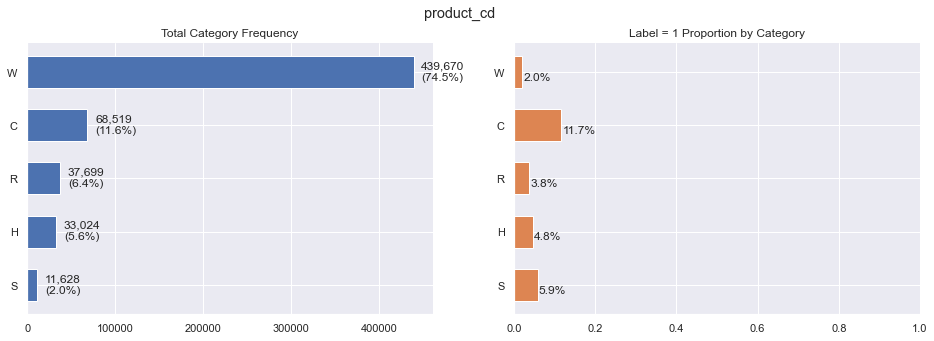

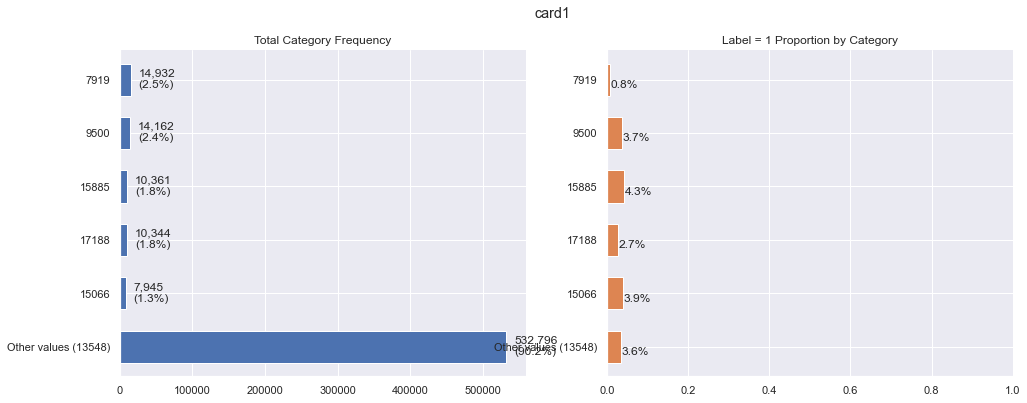

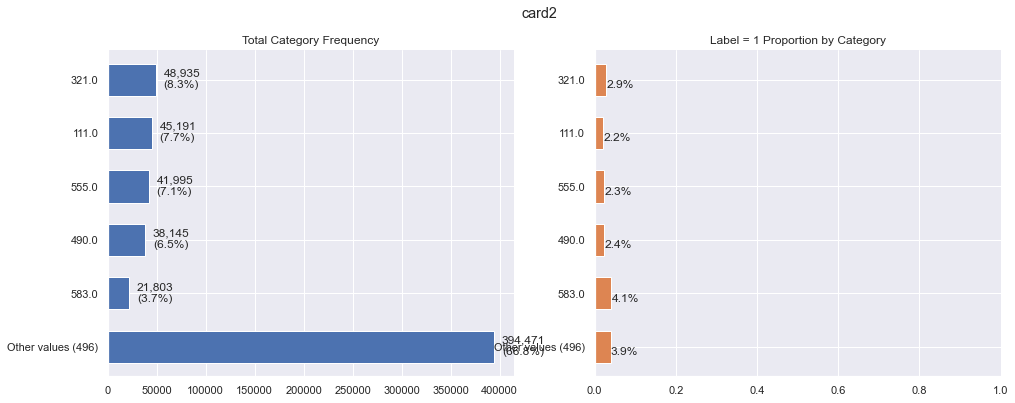

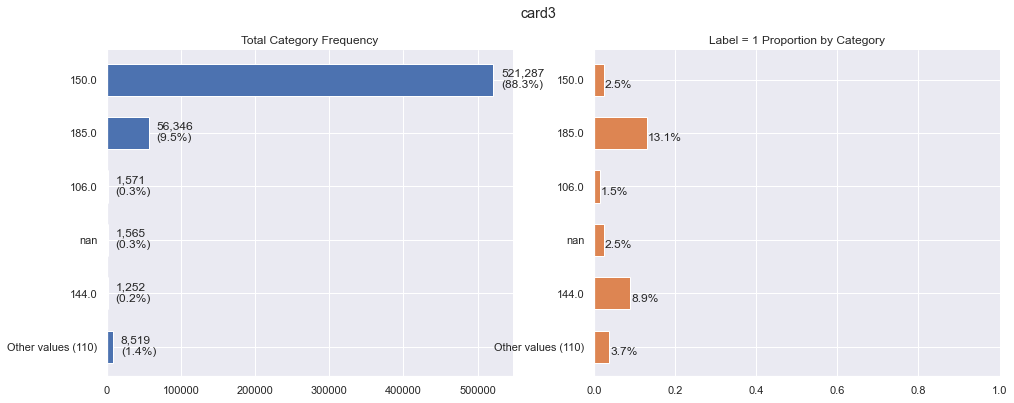

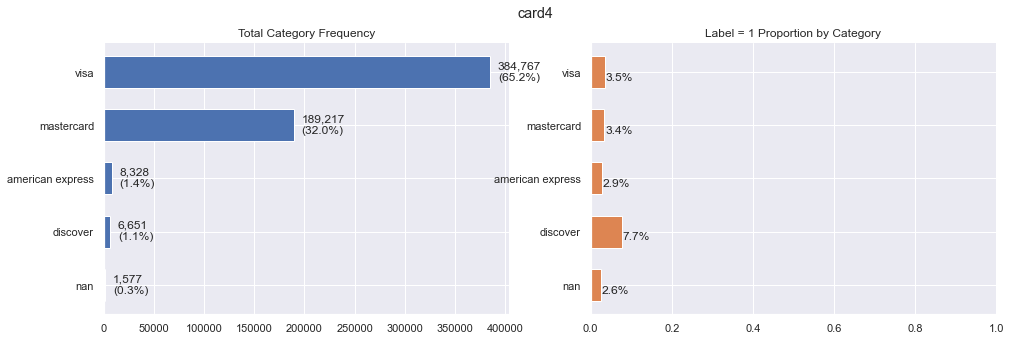

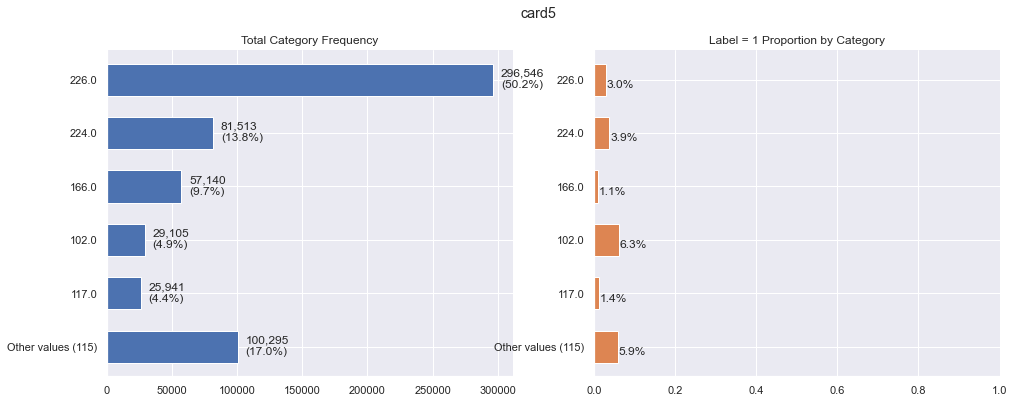

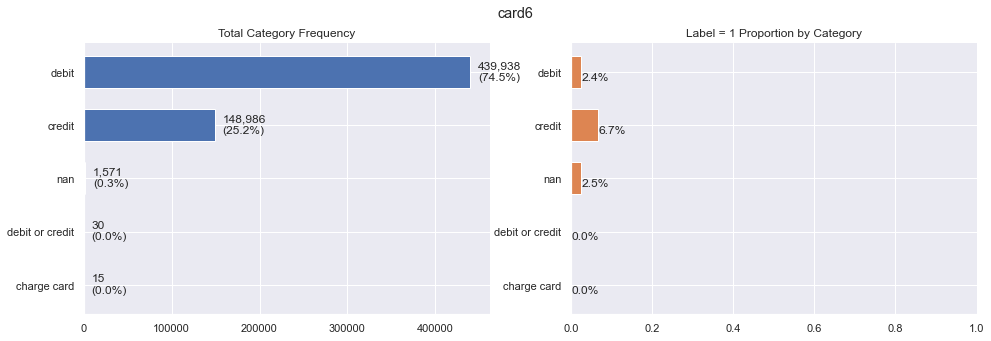

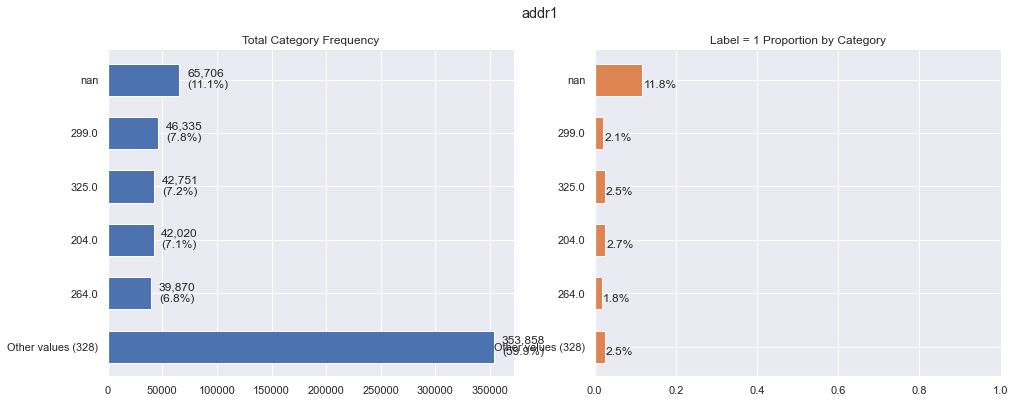

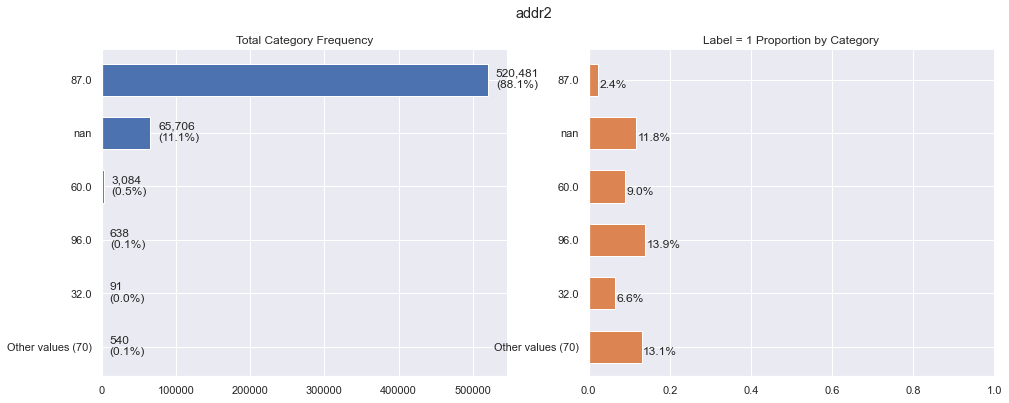

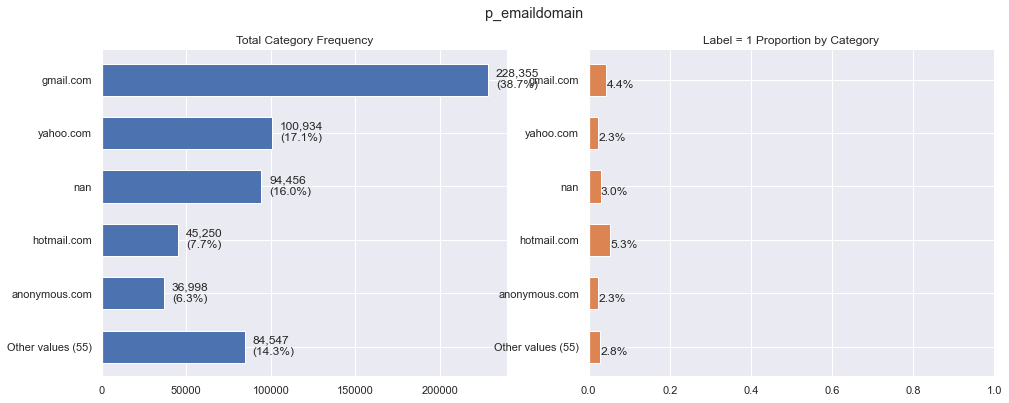

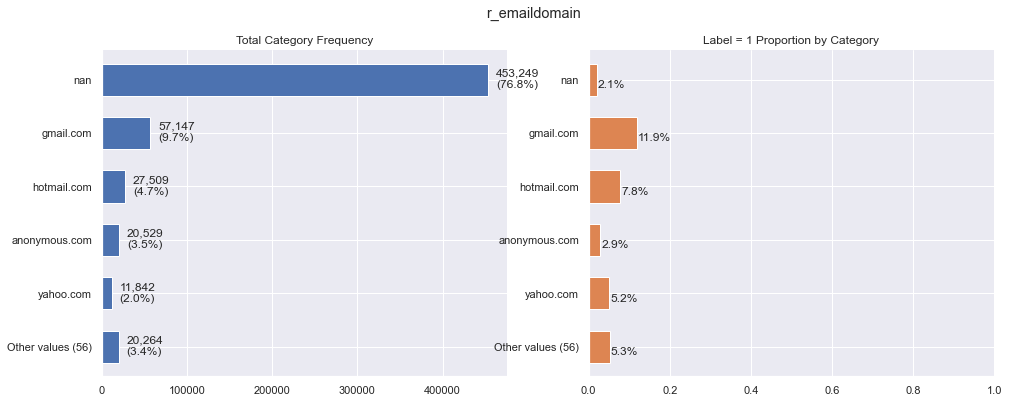

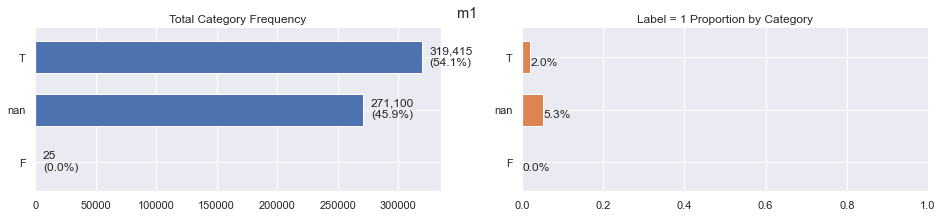

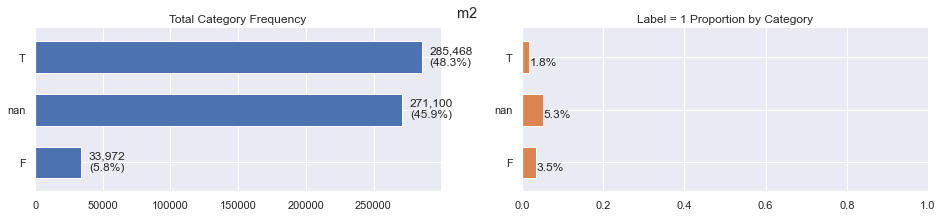

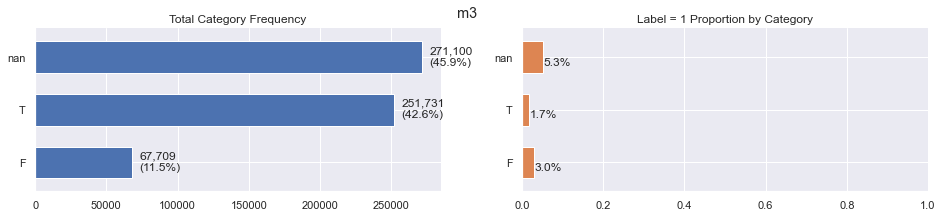

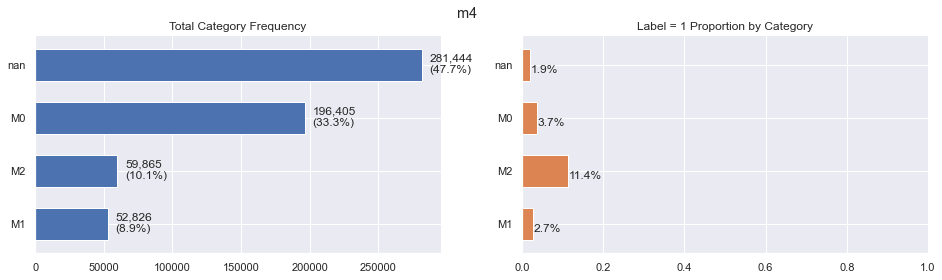

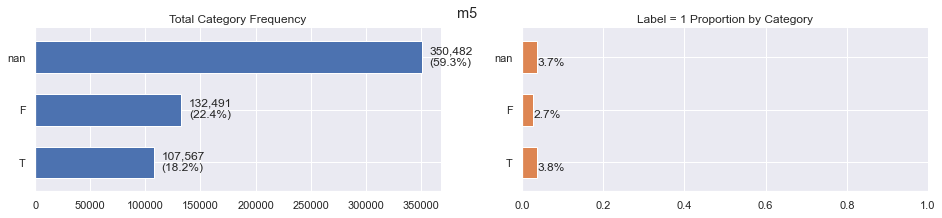

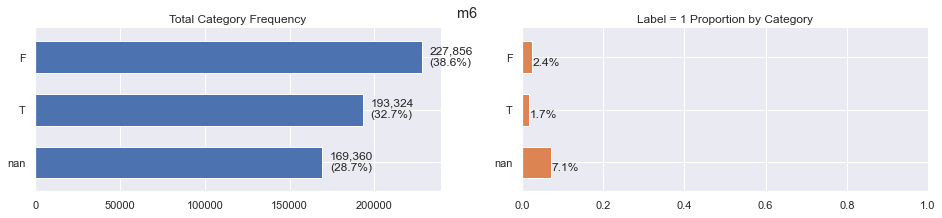

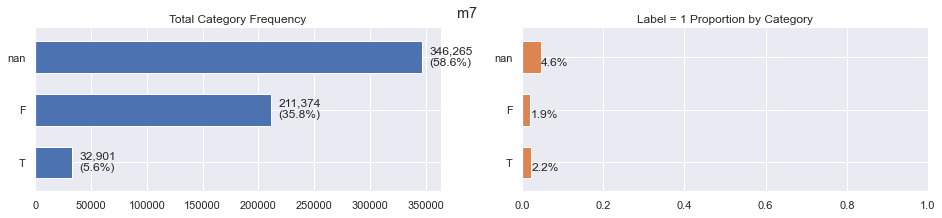

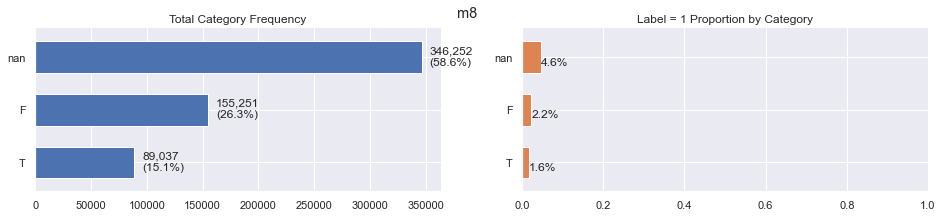

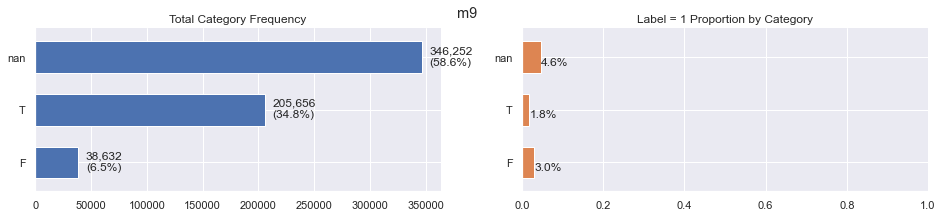

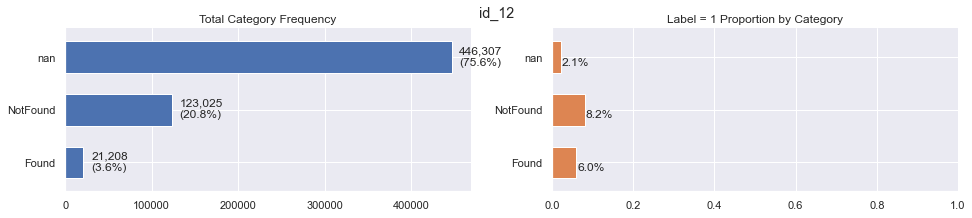

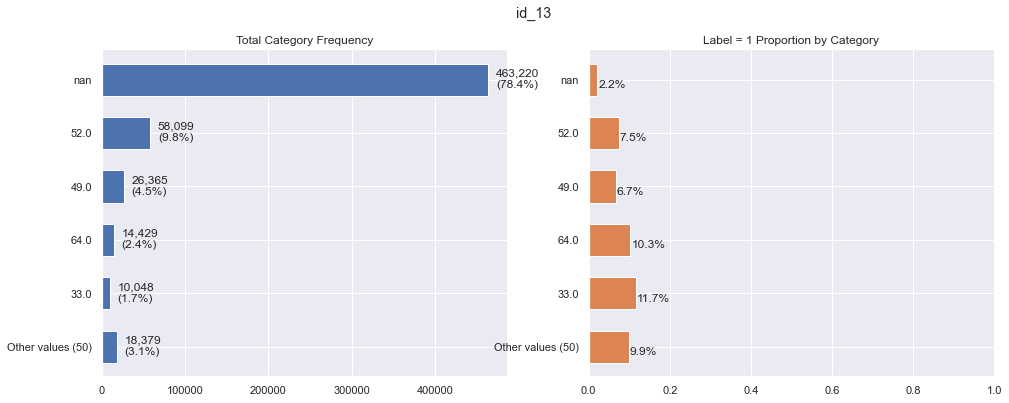

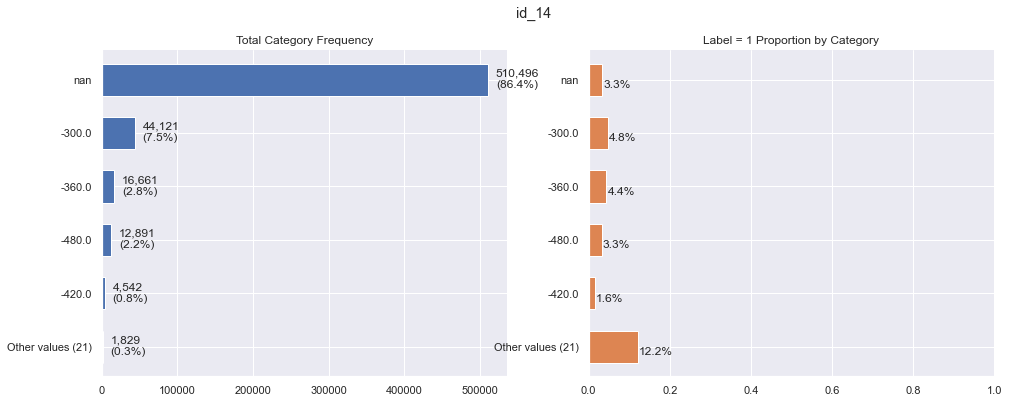

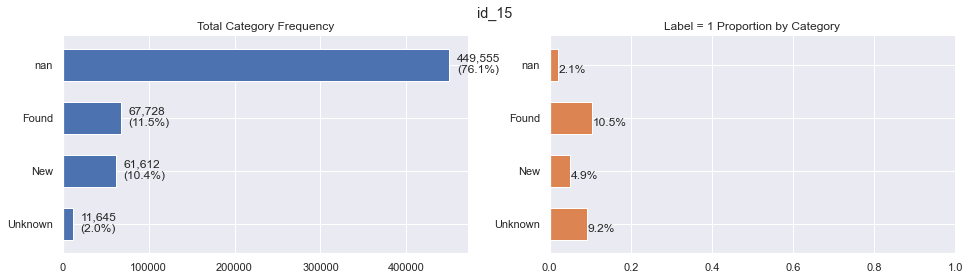

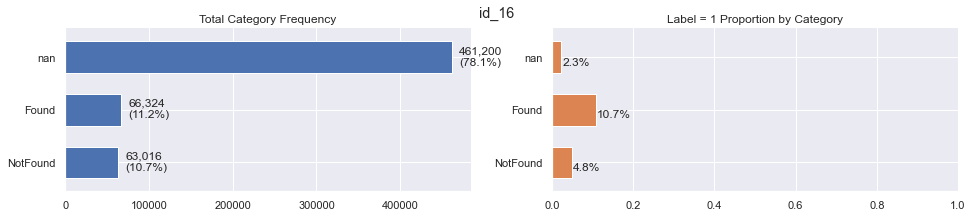

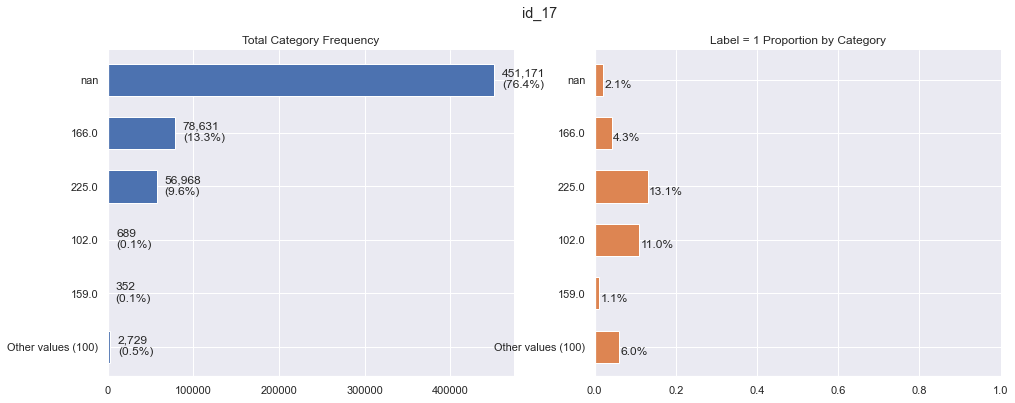

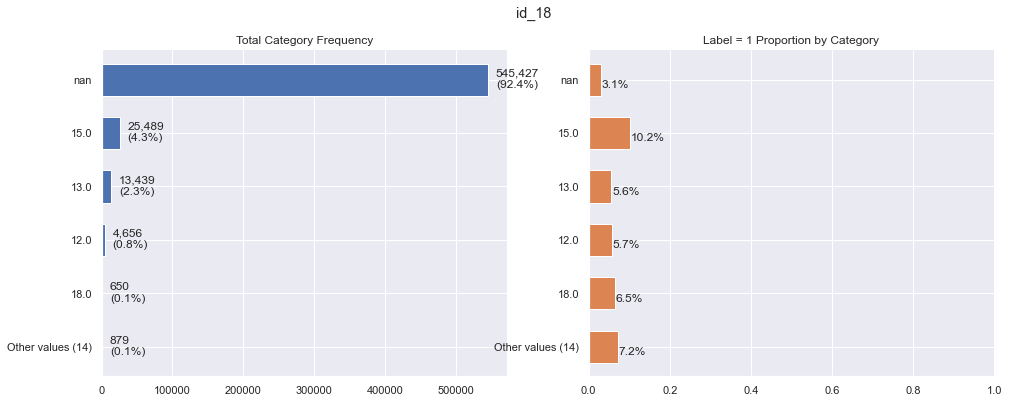

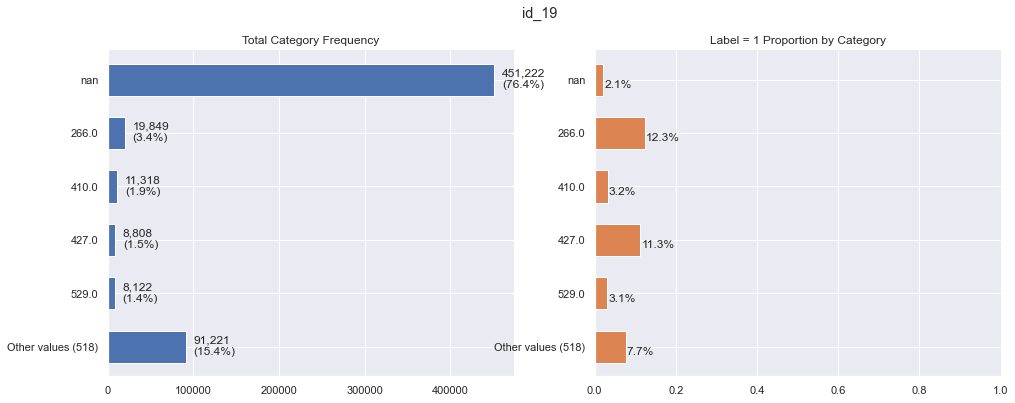

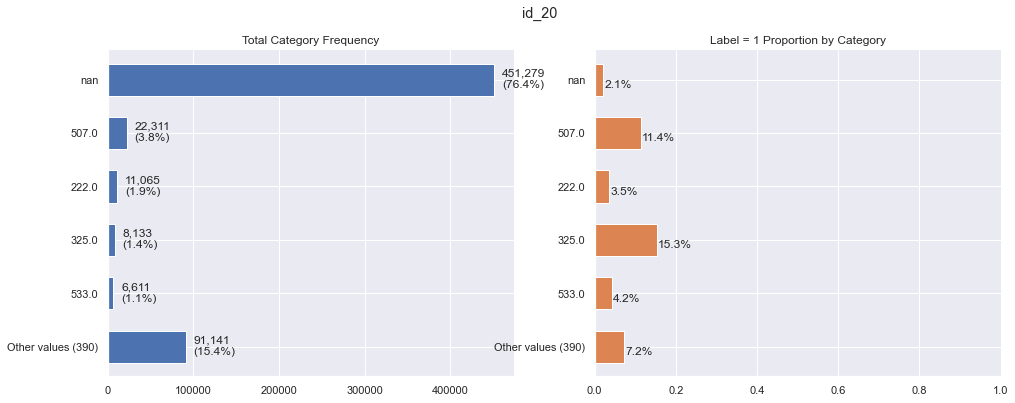

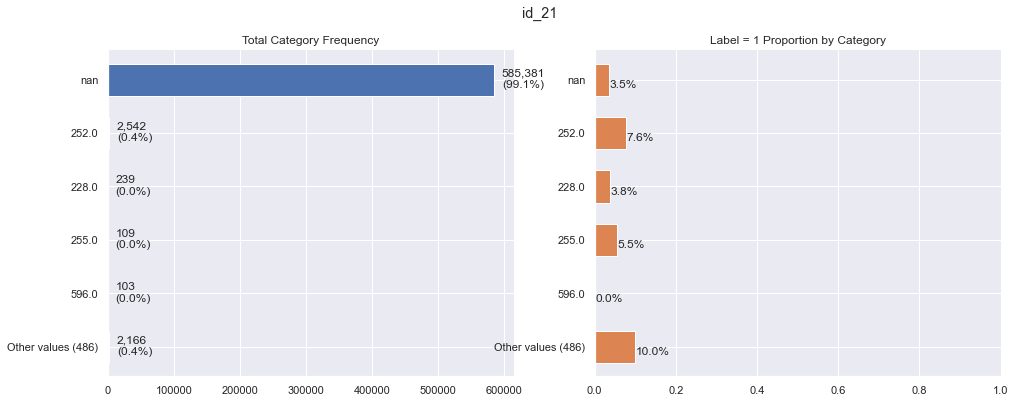

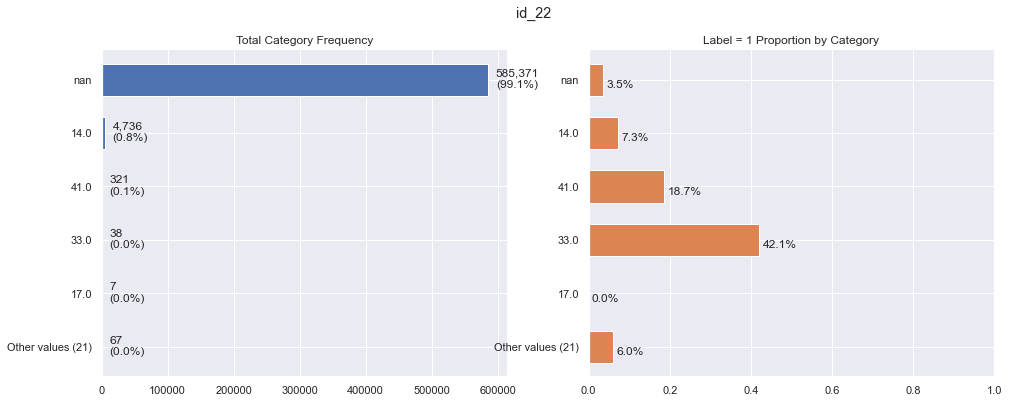

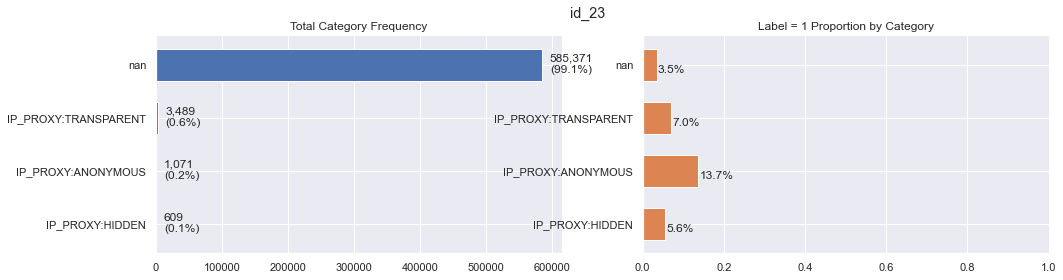

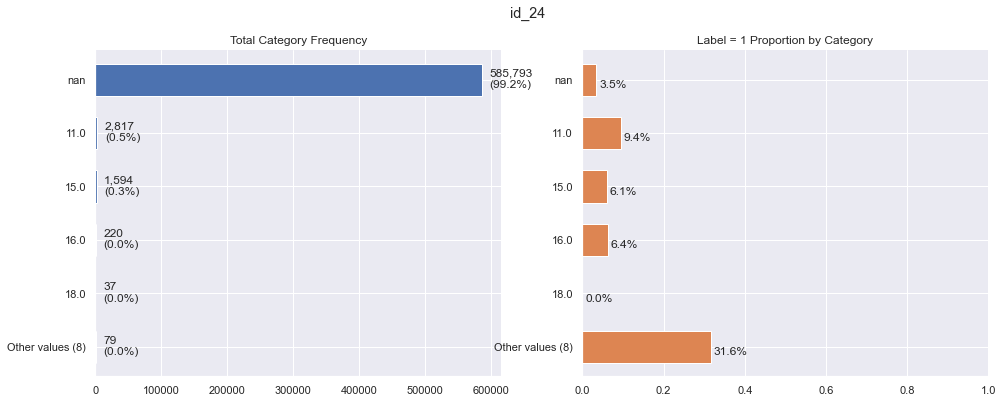

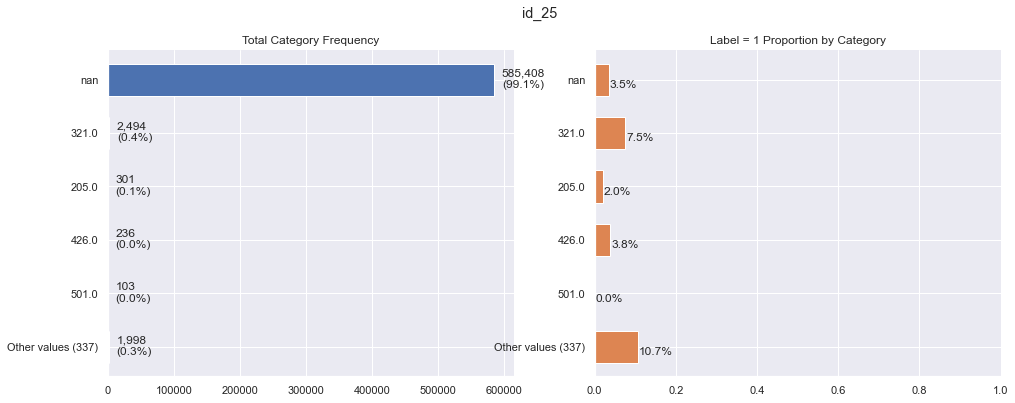

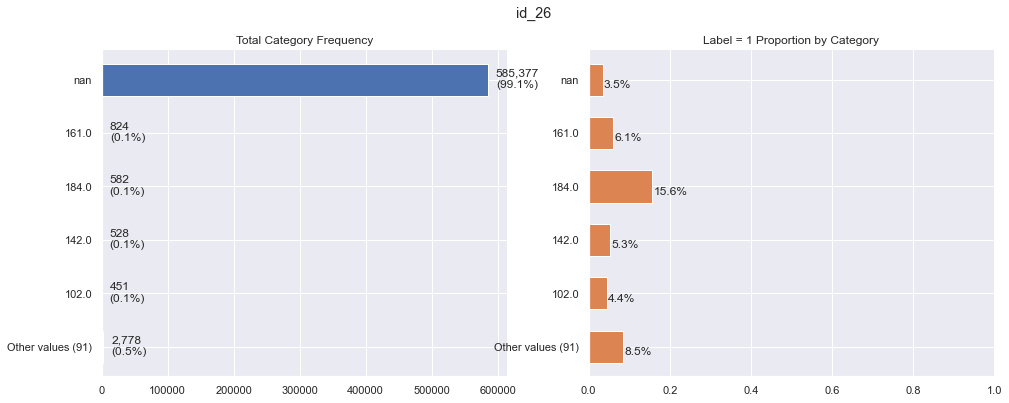

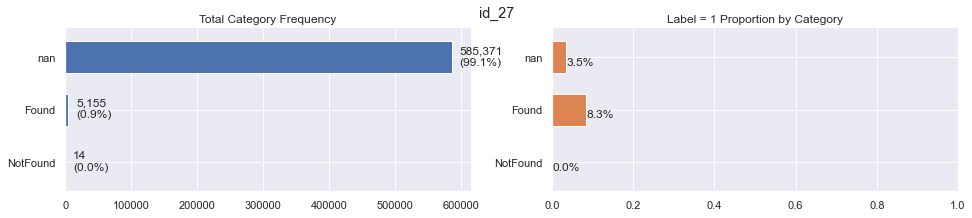

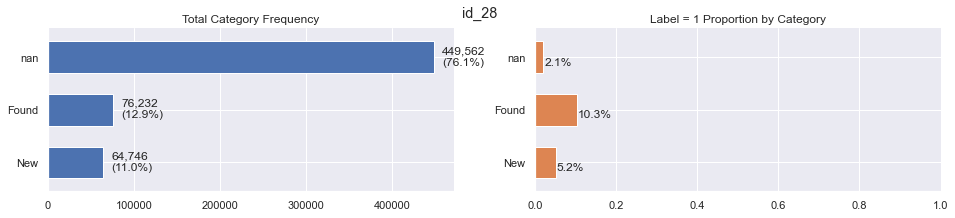

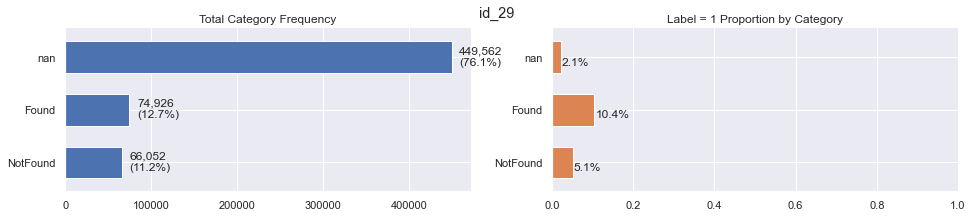

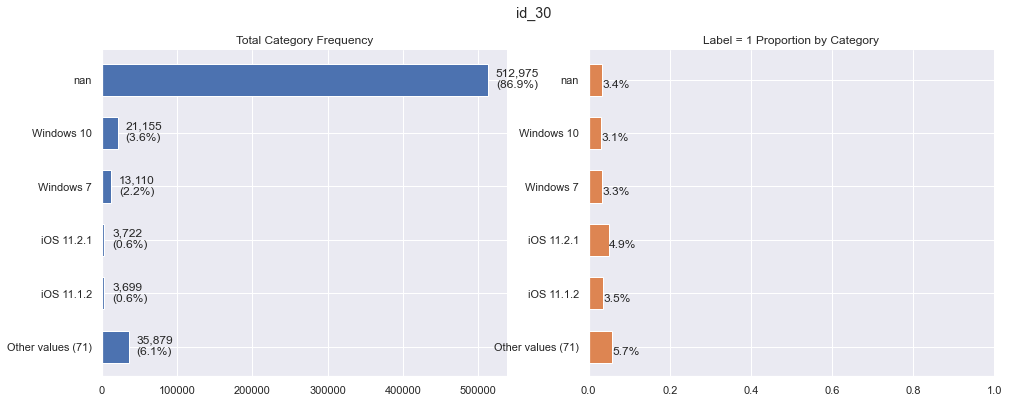

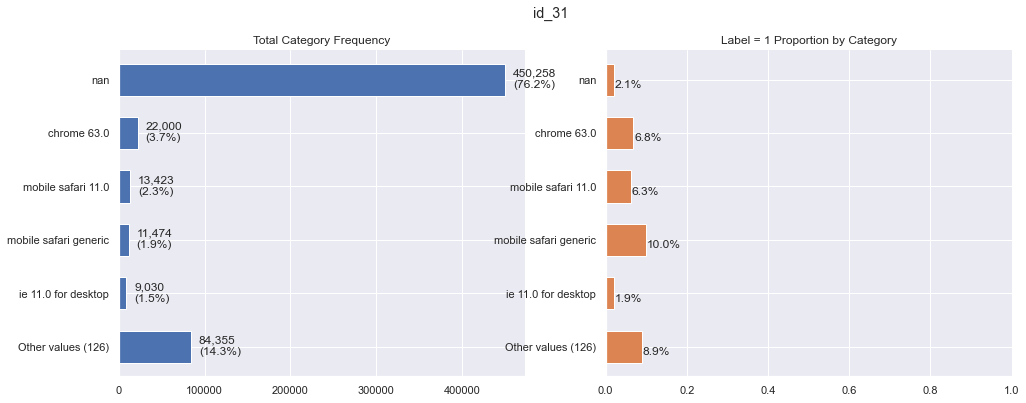

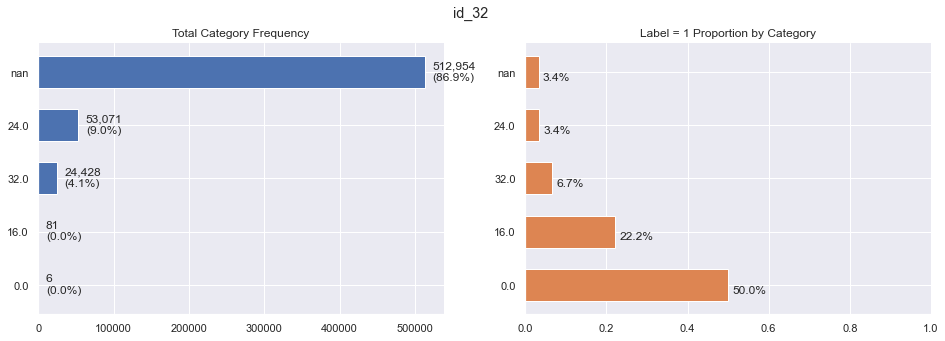

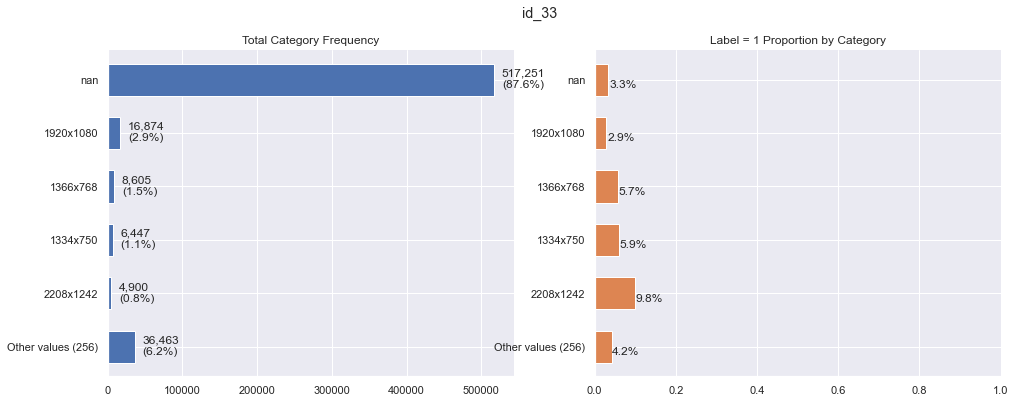

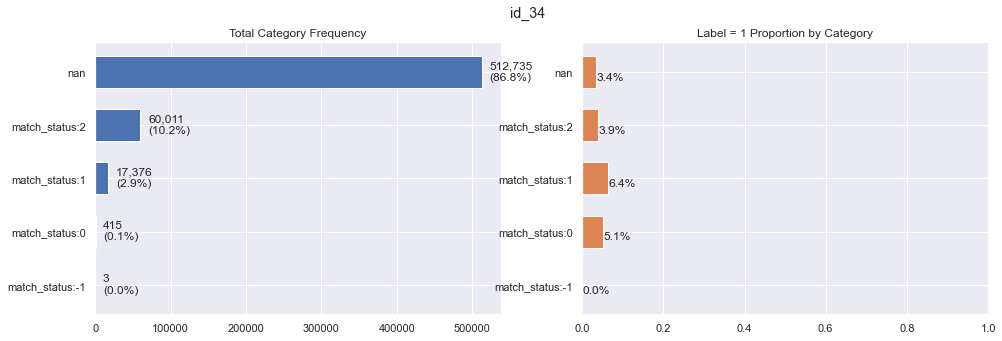

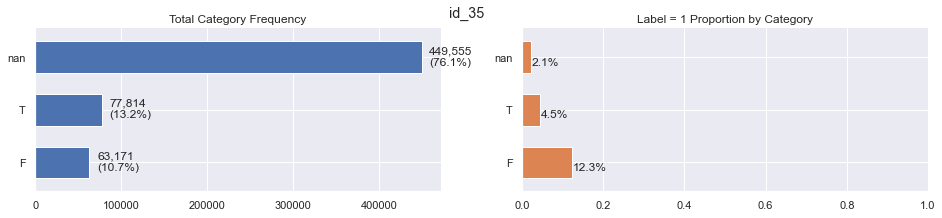

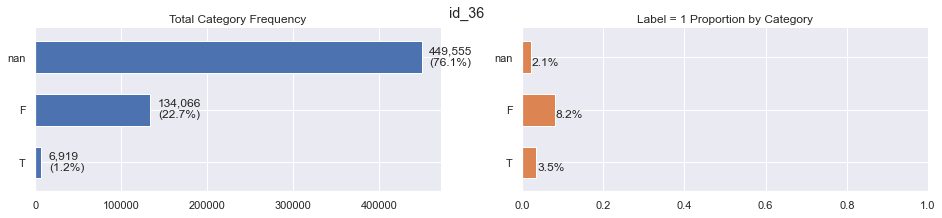

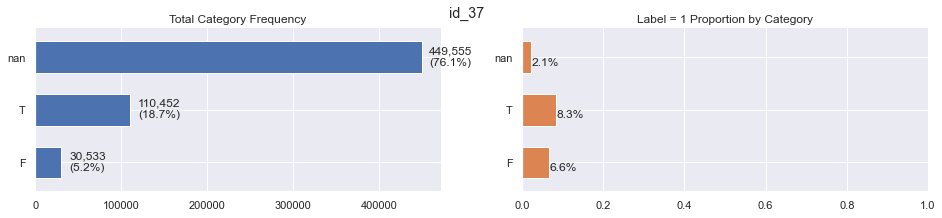

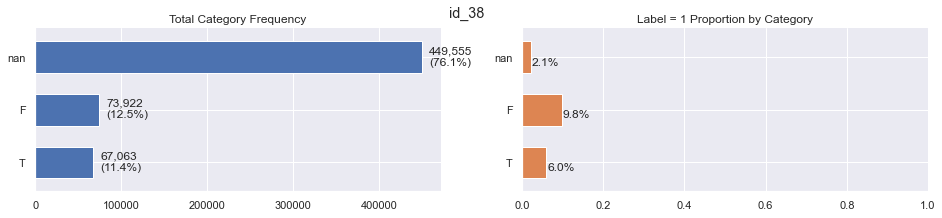

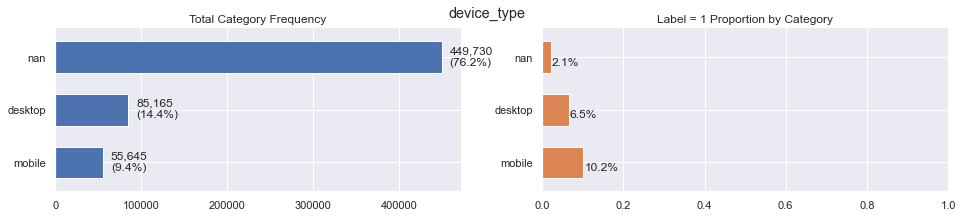

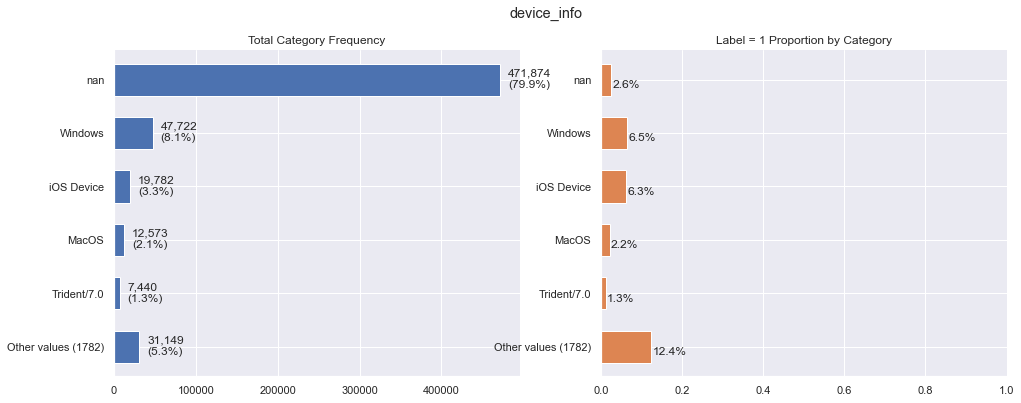

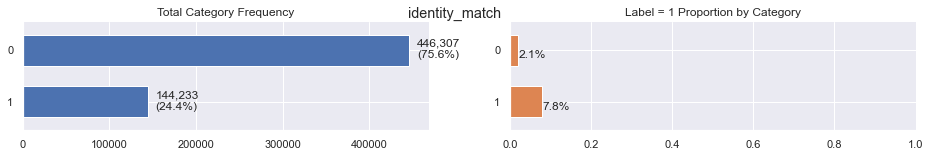

In [12]:
for col in cat_cols:
    bin_analyze_col(train[col],train['is_fraud'])

# Numerical Columns

In [13]:
train['transaction_amt'].describe()

count    590540.000000
mean        134.849594
std         239.162689
min           0.251000
25%          43.320999
50%          68.769001
75%         125.000000
max       31937.390625
Name: transaction_amt, dtype: float64

(<Figure size 720x360 with 2 Axes>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x24e92e3e908>,
  <matplotlib.axes._subplots.AxesSubplot at 0x24e97572788>))

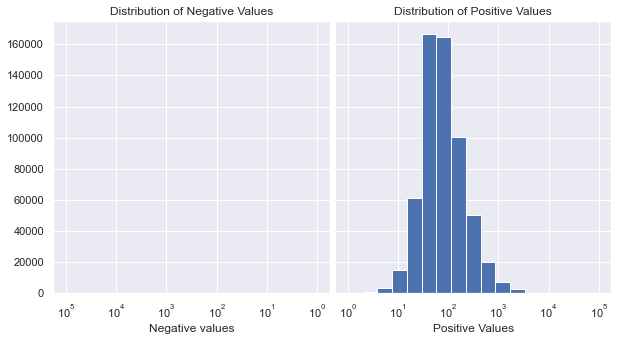

In [14]:
plot_log_hist(train['transaction_amt'], 3)

# UID (User ID)

In [16]:
train.head()

,is_fraud,transaction_dt,transaction_amt,product_cd,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,p_emaildomain,r_emaildomain,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15,m1,m2,m3,m4,m5,m6,m7,m8,m9,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67,v68,v69,v70,v71,v72,v73,v74,v75,v76,v77,v78,v79,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v91,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131,v132,v133,v134,v135,v136,v137,v138,v139,v140,v141,v142,v143,v144,v145,v146,v147,v148,v149,v150,v151,v152,v153,v154,v155,v156,v157,v158,v159,v160,v161,v162,v163,v164,v165,v166,v167,v168,v169,v170,v171,v172,v173,v174,v175,v176,v177,v178,v179,v180,v181,v182,v183,v184,v185,v186,v187,v188,v189,v190,v191,v192,v193,v194,v195,v196,v197,v198,v199,v200,v201,v202,v203,v204,v205,v206,v207,v208,v209,v210,v211,v212,v213,v214,v215,v216,v217,v218,v219,v220,v221,v222,v223,v224,v225,v226,v227,v228,v229,v230,v231,v232,v233,v234,v235,v236,v237,v238,v239,v240,v241,v242,v243,v244,v245,v246,v247,v248,v249,v250,v251,v252,v253,v254,v255,v256,v257,v258,v259,v260,v261,v262,v263,v264,v265,v266,v267,v268,v269,v270,v271,v272,v273,v274,v275,v276,v277,v278,v279,v280,v281,v282,v283,v284,v285,v286,v287,v288,v289,v290,v291,v292,v293,v294,v295,v296,v297,v298,v299,v300,v301,v302,v303,v304,v305,v306,v307,v308,v309,v310,v311,v312,v313,v314,v315,v316,v317,v318,v319,v320,v321,v322,v323,v324,v325,v326,v327,v328,v329,v330,v331,v332,v333,v334,v335,v336,v337,v338,v339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,device_type,device_info,identity_match
transaction_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2987000,0,2017-12-01 00:00:00,68.5,W,13926,nan,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,nan,nan,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,nan,nan,nan,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,

Create d1n column, which corresponds to the number of days before 2017-12-01 that this credit card was first used on the system. This is an engineered feature taken from https://www.kaggle.com/c/ieee-fraud-detection/discussion/111284 . 

In [17]:
train['d1n'] = ((train['transaction_dt'] - pd.to_datetime('2017-12-01')) - pd.to_timedelta(train['d1'], unit='d')).dt.days

In [18]:
uid_cols = ['card1','addr1','d1n']

In [19]:
train[uid_cols].head()

,card1,addr1,d1n
transaction_id,,,
2987000,13926,315.0,-14.0
2987001,2755,325.0,0.0
2987002,4663,330.0,0.0
2987003,18132,476.0,-112.0
2987004,4497,420.0,0.0


In [20]:
uids = train.reset_index().groupby(uid_cols, observed = True)['transaction_id'].first().reset_index()
uids = uids.rename(columns = {'transaction_id':'uid'})

In [21]:
train2 = train.merge(uids, how = 'inner', on = uid_cols)

In [22]:
train2.head()

,is_fraud,transaction_dt,transaction_amt,product_cd,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,p_emaildomain,r_emaildomain,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15,m1,m2,m3,m4,m5,m6,m7,m8,m9,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67,v68,v69,v70,v71,v72,v73,v74,v75,v76,v77,v78,v79,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v91,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131,v132,v133,v134,v135,v136,v137,v138,v139,v140,v141,v142,v143,v144,v145,v146,v147,v148,v149,v150,v151,v152,v153,v154,v155,v156,v157,v158,v159,v160,v161,v162,v163,v164,v165,v166,v167,v168,v169,v170,v171,v172,v173,v174,v175,v176,v177,v178,v179,v180,v181,v182,v183,v184,v185,v186,v187,v188,v189,v190,v191,v192,v193,v194,v195,v196,v197,v198,v199,v200,v201,v202,v203,v204,v205,v206,v207,v208,v209,v210,v211,v212,v213,v214,v215,v216,v217,v218,v219,v220,v221,v222,v223,v224,v225,v226,v227,v228,v229,v230,v231,v232,v233,v234,v235,v236,v237,v238,v239,v240,v241,v242,v243,v244,v245,v246,v247,v248,v249,v250,v251,v252,v253,v254,v255,v256,v257,v258,v259,v260,v261,v262,v263,v264,v265,v266,v267,v268,v269,v270,v271,v272,v273,v274,v275,v276,v277,v278,v279,v280,v281,v282,v283,v284,v285,v286,v287,v288,v289,v290,v291,v292,v293,v294,v295,v296,v297,v298,v299,v300,v301,v302,v303,v304,v305,v306,v307,v308,v309,v310,v311,v312,v313,v314,v315,v316,v317,v318,v319,v320,v321,v322,v323,v324,v325,v326,v327,v328,v329,v330,v331,v332,v333,v334,v335,v336,v337,v338,v339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,device_type,device_info,identity_match,d1n,uid
0,0,2017-12-01 00:00:00,68.5,W,13926,nan,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,nan,nan,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,nan,nan,nan,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,-14.0,2987000
1,0,2017-12-01 00:00:01,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,

In [23]:
train.shape

(590540, 435)

In [24]:
train2.shape

(589271, 436)

In [26]:
train.reset_index().groupby(uid_cols, observed = True)['transaction_id'].first().shape

(217020,)

In [27]:
train.reset_index().head()

,transaction_id,is_fraud,transaction_dt,transaction_amt,product_cd,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,p_emaildomain,r_emaildomain,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15,m1,m2,m3,m4,m5,m6,m7,m8,m9,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67,v68,v69,v70,v71,v72,v73,v74,v75,v76,v77,v78,v79,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v91,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131,v132,v133,v134,v135,v136,v137,v138,v139,v140,v141,v142,v143,v144,v145,v146,v147,v148,v149,v150,v151,v152,v153,v154,v155,v156,v157,v158,v159,v160,v161,v162,v163,v164,v165,v166,v167,v168,v169,v170,v171,v172,v173,v174,v175,v176,v177,v178,v179,v180,v181,v182,v183,v184,v185,v186,v187,v188,v189,v190,v191,v192,v193,v194,v195,v196,v197,v198,v199,v200,v201,v202,v203,v204,v205,v206,v207,v208,v209,v210,v211,v212,v213,v214,v215,v216,v217,v218,v219,v220,v221,v222,v223,v224,v225,v226,v227,v228,v229,v230,v231,v232,v233,v234,v235,v236,v237,v238,v239,v240,v241,v242,v243,v244,v245,v246,v247,v248,v249,v250,v251,v252,v253,v254,v255,v256,v257,v258,v259,v260,v261,v262,v263,v264,v265,v266,v267,v268,v269,v270,v271,v272,v273,v274,v275,v276,v277,v278,v279,v280,v281,v282,v283,v284,v285,v286,v287,v288,v289,v290,v291,v292,v293,v294,v295,v296,v297,v298,v299,v300,v301,v302,v303,v304,v305,v306,v307,v308,v309,v310,v311,v312,v313,v314,v315,v316,v317,v318,v319,v320,v321,v322,v323,v324,v325,v326,v327,v328,v329,v330,v331,v332,v333,v334,v335,v336,v337,v338,v339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,device_type,device_info,identity_match,d1n
0,2987000,0,2017-12-01 00:00:00,68.5,W,13926,nan,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,nan,nan,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,nan,nan,nan,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,-14.0
1,2987001,0,2017-12-01 00:00:01,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,

In [28]:
train.iloc[:1000].groupby(uid_cols, observed = True).size()

card1  addr1  d1n   
13926  315.0  -14.0     1
2755   325.0   0.0      1
       205.0  -479.0    1
4663   330.0   0.0      1
       184.0   0.0      1
                       ..
17966  472.0  -361.0    1
1991   231.0  -21.0     1
3867   nan     0.0      2
3638   492.0  -204.0    1
15165  264.0  -58.0     1
Length: 775, dtype: int64

# Datetime EDA

In [29]:
date_eda = train[['is_fraud','transaction_dt']].copy()

In [30]:
date_eda['year_day'] = date_eda['transaction_dt'].values.astype('datetime64[D]')
date_eda['year_week'] = date_eda['transaction_dt'].values.astype('datetime64[W]')
date_eda['year_month'] = date_eda['transaction_dt'].values.astype('datetime64[M]')

date_eda['day_of_week'] = date_eda['transaction_dt'].dt.dayofweek

date_eda['hour'] = date_eda['transaction_dt'].dt.hour
date_eda['minute'] = date_eda['transaction_dt'].dt.minute
date_eda['second'] = date_eda['transaction_dt'].dt.second

In [31]:
def plot_cross(col):
    cross = pd.crosstab(date_eda[col],date_eda['is_fraud'])
    cross['rate'] = cross[1] / (cross[0] + cross[1])
    
    cross['rate'].plot()

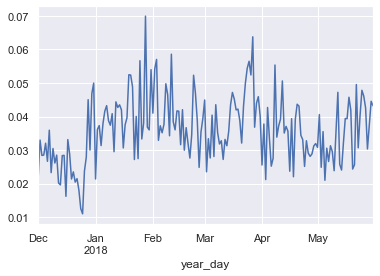

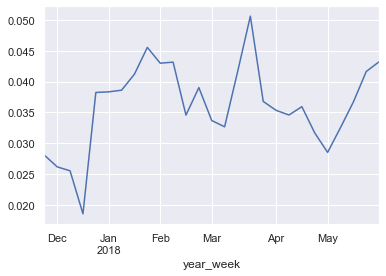

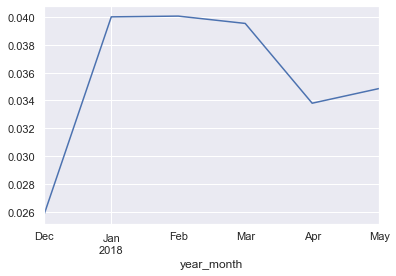

In [32]:
for name in ['year_day','year_week','year_month']:
    plot_cross(name)
    plt.show()

1. The fraud rate clearly varies by day fairly substantially, though it's very noisy.
2. Variance by week and by month are similar, there are some trends there but it's unclear how well we'll be able to work with them.

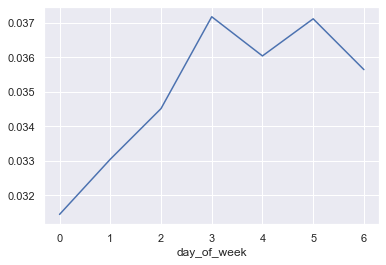

In [33]:
plot_cross('day_of_week')

1. Fraud doesn't seem to vary all that much by day of the week.

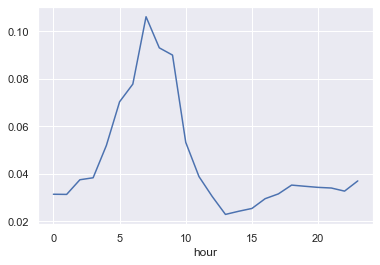

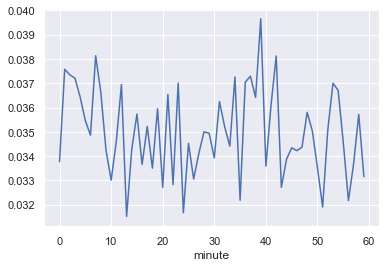

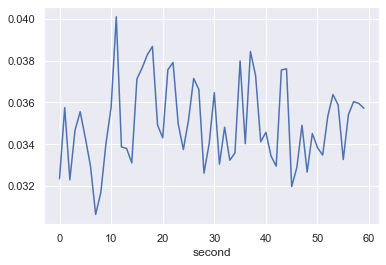

In [34]:
for name in ['hour','minute','second']:
    plot_cross(name)
    plt.show()

1. Hour of the day seems to be by far the best correlate with fraud rate so far.
2. Minute of the hour and second of the minute don't really do much, which isn't surprising.